# UBER - Predictive Traffic Modelling

1. Component 1: Getting Started
2. Component 2: Exploratory Data Analysis & Data Preparation
3. Component 3: Industry Research, Data collection and Integration
4. Component 4: Data Modelling and Model Evaluation
5. Component 5: Data Visualisation and Analysis
6. Component 6: The Final Step

## Getting Started

Develop a predictive model to accurately forecast hourly traffic volumes at different road junctions based on historical traffic data

## Exploratory Data Analysis & Data Preparation

### Step -1: Data Cleaning & Pre-processing

1. Load Raw Data:
- Read the collected data into pandas DataFrames.

2. Clean Data:
- Handle missing values using methods like imputation or removal (df.fillna(), df.dropna()).
- Remove duplicates (df.drop_duplicates()).
- Correct data types (df.astype()).

3. Aggregate traffic data:
- Compile traffic data into hourly intervals for each junction.
- Ensure data includes relevant details such as vehicle counts.

4. Preprocess the data:
- Normalize or standardize the data to facilitate comparison across different time periods and junctions.

#### Importing Libraries

In [11]:
# Suppressing warnings:

import warnings
warnings.filterwarnings('ignore')

# Importing Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#### 1. Load Raw Data

In [14]:
df = pd.read_csv('Dataset_Uber Traffic.csv')

In [16]:
df.head()

,DateTime,Junction,Vehicles,ID
0,01/11/15 0:00,1,15,20151101001
1,01/11/15 1:00,1,13,20151101011
2,01/11/15 2:00,1,10,20151101021
3,01/11/15 3:00,1,7,20151101031
4,01/11/15 4:00,1,9,20151101041


In [18]:
df.shape

(48120, 4)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [22]:
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


#### 2. Clean Data

In [25]:
# Checking for null values

df.isna().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [27]:
# Checking for Duplicate values

df.duplicated().sum()

np.int64(0)

As we can see that, There are no Null values or Duplicate values in the given Dataset.

In [30]:
df.shape

(48120, 4)

In [32]:
# Correcting data types

# We have the DateTime column as Object type. But, It should be in DateTime type. So, we are parsing the datatype.
df['DateTime'] = df['DateTime'].astype('datetime64[ns]')

In [33]:
df

,DateTime,Junction,Vehicles,ID
0,2015-01-11 00:00:00,1,15,20151101001
1,2015-01-11 01:00:00,1,13,20151101011
2,2015-01-11 02:00:00,1,10,20151101021
3,2015-01-11 03:00:00,1,7,20151101031
4,2015-01-11 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


#### 3. Aggregate traffic data

In [36]:
df = df.set_index('DateTime')

In [37]:
# Compiling traffic data into hourly intervals for each junction and Ensuring data includes relevant details such as vehicle counts.

hourly_data = df.groupby('Junction').resample('H')['Vehicles'].sum().reset_index()

hourly_data

,Junction,DateTime,Vehicles
0,1,2015-01-11 00:00:00,15
1,1,2015-01-11 01:00:00,13
2,1,2015-01-11 02:00:00,10
3,1,2015-01-11 03:00:00,7
4,1,2015-01-11 04:00:00,9
...,...,...,...
84547,4,2017-12-06 19:00:00,10
84548,4,2017-12-06 20:00:00,7
84549,4,2017-12-06 21:00:00,8
84550,4,2017-12-06 22:00:00,11


#### 4. Preprocess the data

In [44]:
# Normalize or standardize the data to facilitate comparison across different time periods and junctions.

In [46]:
# Standardization (Z-score scaling) is usually better for time series forecasting models.

hourly_data_scaled = hourly_data.copy()

standard_scaler = StandardScaler()
hourly_data_scaled['Vehicles_Standard'] = standard_scaler.fit_transform(hourly_data_scaled[['Vehicles']])

In [48]:
hourly_data_scaled.head()

,Junction,DateTime,Vehicles,Vehicles_Standard
0,1,2015-01-11 00:00:00,15,0.105143
1,1,2015-01-11 01:00:00,13,0.001506
2,1,2015-01-11 02:00:00,10,-0.153950
3,1,2015-01-11 03:00:00,7,-0.309406
4,1,2015-01-11 04:00:00,9,-0.205768


### Step - 2: Feature Engineering and Selection

1. Create new features from raw data:
- Generate time-based features such as hour of the day, day of the week, and month.
- Develop lag features by including traffic data from previous hours or days to capture temporal dependencies.
- Create binary indicators for weekends and special events to account for their impact on traffic.

2. Evaluate feature importance:
- Use statistical methods and machine learning techniques (e.g., correlation analysis, feature importance from tree-based models) to assess the relevance of each feature.
- Select the most influential features for model training to improve efficiency and performance.

In [54]:
print(df)

                     Junction  Vehicles           ID
DateTime                                            
2015-01-11 00:00:00         1        15  20151101001
2015-01-11 01:00:00         1        13  20151101011
2015-01-11 02:00:00         1        10  20151101021
2015-01-11 03:00:00         1         7  20151101031
2015-01-11 04:00:00         1         9  20151101041
...                       ...       ...          ...
2017-06-30 19:00:00         4        11  20170630194
2017-06-30 20:00:00         4        30  20170630204
2017-06-30 21:00:00         4        16  20170630214
2017-06-30 22:00:00         4        22  20170630224
2017-06-30 23:00:00         4        12  20170630234

[48120 rows x 3 columns]


In [56]:
print(hourly_data)

       Junction            DateTime  Vehicles
0             1 2015-01-11 00:00:00        15
1             1 2015-01-11 01:00:00        13
2             1 2015-01-11 02:00:00        10
3             1 2015-01-11 03:00:00         7
4             1 2015-01-11 04:00:00         9
...         ...                 ...       ...
84547         4 2017-12-06 19:00:00        10
84548         4 2017-12-06 20:00:00         7
84549         4 2017-12-06 21:00:00         8
84550         4 2017-12-06 22:00:00        11
84551         4 2017-12-06 23:00:00        11

[84552 rows x 3 columns]


In [58]:
print(hourly_data_scaled)

       Junction            DateTime  Vehicles  Vehicles_Standard
0             1 2015-01-11 00:00:00        15           0.105143
1             1 2015-01-11 01:00:00        13           0.001506
2             1 2015-01-11 02:00:00        10          -0.153950
3             1 2015-01-11 03:00:00         7          -0.309406
4             1 2015-01-11 04:00:00         9          -0.205768
...         ...                 ...       ...                ...
84547         4 2017-12-06 19:00:00        10          -0.153950
84548         4 2017-12-06 20:00:00         7          -0.309406
84549         4 2017-12-06 21:00:00         8          -0.257587
84550         4 2017-12-06 22:00:00        11          -0.102131
84551         4 2017-12-06 23:00:00        11          -0.102131

[84552 rows x 4 columns]


#### 1. Create new features from raw data

##### 1. Generate time-based features such as hour of the day, day of the week, and month.

In [62]:
hourly_data_scaled['Hour'] = hourly_data_scaled['DateTime'].dt.hour
hourly_data_scaled['DayOfWeek'] = hourly_data_scaled['DateTime'].dt.dayofweek   # 0=Mon, 6=Sun
hourly_data_scaled['Month'] = hourly_data_scaled['DateTime'].dt.month

In [64]:
hourly_data_scaled

,Junction,DateTime,Vehicles,Vehicles_Standard,Hour,DayOfWeek,Month
0,1,2015-01-11 00:00:00,15,0.105143,0,6,1
1,1,2015-01-11 01:00:00,13,0.001506,1,6,1
2,1,2015-01-11 02:00:00,10,-0.153950,2,6,1
3,1,2015-01-11 03:00:00,7,-0.309406,3,6,1
4,1,2015-01-11 04:00:00,9,-0.205768,4,6,1
...,...,...,...,...,...,...,...
84547,4,2017-12-06 19:00:00,10,-0.153950,19,2,12
84548,4,2017-12-06 20:00:00,7,-0.309406,20,2,12
84549,4,2017-12-06 21:00:00,8,-0.257587,21,2,12
84550,4,2017-12-06 22:00:00,11,-0.102131,22,2,12


##### 2. Develop lag features by including traffic data from previous hours or days to capture temporal dependencies.

In [67]:
for lag in [1,24,168]:   # previous 1hour, 1day, 1week
    hourly_data_scaled[f'Lag{lag}'] = hourly_data_scaled.groupby('Junction')['Vehicles_Standard'].shift(lag)

In [69]:
hourly_data_scaled

,Junction,DateTime,Vehicles,Vehicles_Standard,Hour,DayOfWeek,Month,Lag1,Lag24,Lag168
0,1,2015-01-11 00:00:00,15,0.105143,0,6,1,NaN,NaN,NaN
1,1,2015-01-11 01:00:00,13,0.001506,1,6,1,0.105143,NaN,NaN
2,1,2015-01-11 02:00:00,10,-0.153950,2,6,1,0.001506,NaN,NaN
3,1,2015-01-11 03:00:00,7,-0.309406,3,6,1,-0.153950,NaN,NaN
4,1,2015-01-11 04:00:00,9,-0.205768,4,6,1,-0.309406,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
84547,4,2017-12-06 19:00:00,10,-0.153950,19,2,12,-0.205768,-0.464861,-0.672136
84548,4,2017-12-06 20:00:00,7,-0.309406,20,2,12,-0.153950,-0.205768,-0.672136
84549,4,2017-12-06 21:00:00,8,-0.257587,21,2,12,-0.309406,-0.309406,-0.672136
84550,4,2017-12-06 22:00:00,11,-0.102131,22,2,12,-0.257587,-0.413043,-0.672136


##### 3. Create binary indicators for weekends and special events to account for their impact on traffic.

In [71]:
# Binary indicators for weekends

hourly_data_scaled['IsWeekend'] = hourly_data_scaled['DayOfWeek'].isin([5, 6]).astype(int)

In [73]:
hourly_data_scaled.head()

,Junction,DateTime,Vehicles,Vehicles_Standard,Hour,DayOfWeek,Month,Lag1,Lag24,Lag168,IsWeekend
0,1,2015-01-11 00:00:00,15,0.105143,0,6,1,NaN,NaN,NaN,1
1,1,2015-01-11 01:00:00,13,0.001506,1,6,1,0.105143,NaN,NaN,1
2,1,2015-01-11 02:00:00,10,-0.153950,2,6,1,0.001506,NaN,NaN,1
3,1,2015-01-11 03:00:00,7,-0.309406,3,6,1,-0.153950,NaN,NaN,1
4,1,2015-01-11 04:00:00,9,-0.205768,4,6,1,-0.309406,NaN,NaN,1


In [75]:
# Binary indicators for Special events

start_date, end_date = hourly_data_scaled["DateTime"].min(), hourly_data_scaled["DateTime"].max()
special_events = holidays.India(years=range(start_date.year, end_date.year + 1))

hourly_data_scaled['IsSpecialEvent'] = hourly_data_scaled["DateTime"].dt.date.astype("datetime64[ns]").isin(special_events).astype(int)

In [77]:
hourly_data_scaled.head()

,Junction,DateTime,Vehicles,Vehicles_Standard,Hour,DayOfWeek,Month,Lag1,Lag24,Lag168,IsWeekend,IsSpecialEvent
0,1,2015-01-11 00:00:00,15,0.105143,0,6,1,NaN,NaN,NaN,1,0
1,1,2015-01-11 01:00:00,13,0.001506,1,6,1,0.105143,NaN,NaN,1,0
2,1,2015-01-11 02:00:00,10,-0.153950,2,6,1,0.001506,NaN,NaN,1,0
3,1,2015-01-11 03:00:00,7,-0.309406,3,6,1,-0.153950,NaN,NaN,1,0
4,1,2015-01-11 04:00:00,9,-0.205768,4,6,1,-0.309406,NaN,NaN,1,0


In [79]:
# Add rolling features
hourly_data_scaled['Rolling_Mean_3'] = hourly_data_scaled.groupby('Junction')['Vehicles_Standard'].shift(1).rolling(3).mean()
hourly_data_scaled['Rolling_Mean_24'] = hourly_data_scaled.groupby('Junction')['Vehicles_Standard'].shift(1).rolling(24).mean()

In [81]:
hourly_data_scaled.head()

,Junction,DateTime,Vehicles,Vehicles_Standard,Hour,DayOfWeek,Month,Lag1,Lag24,Lag168,IsWeekend,IsSpecialEvent,Rolling_Mean_3,Rolling_Mean_24
0,1,2015-01-11 00:00:00,15,0.105143,0,6,1,NaN,NaN,NaN,1,0,NaN,NaN
1,1,2015-01-11 01:00:00,13,0.001506,1,6,1,0.105143,NaN,NaN,1,0,NaN,NaN
2,1,2015-01-11 02:00:00,10,-0.153950,2,6,1,0.001506,NaN,NaN,1,0,NaN,NaN
3,1,2015-01-11 03:00:00,7,-0.309406,3,6,1,-0.153950,NaN,NaN,1,0,-0.015767,NaN
4,1,2015-01-11 04:00:00,9,-0.205768,4,6,1,-0.309406,NaN,NaN,1,0,-0.153950,NaN


Dropping Nan Values

In [84]:
hourly_data_scaled = hourly_data_scaled.dropna().reset_index(drop=True)

In [86]:
hourly_data_scaled.head()

,Junction,DateTime,Vehicles,Vehicles_Standard,Hour,DayOfWeek,Month,Lag1,Lag24,Lag168,IsWeekend,IsSpecialEvent,Rolling_Mean_3,Rolling_Mean_24
0,1,2015-01-18 00:00:00,0,-0.672136,0,6,1,-0.672136,-0.672136,0.105143,1,0,-0.672136,-0.672136
1,1,2015-01-18 01:00:00,0,-0.672136,1,6,1,-0.672136,-0.672136,0.001506,1,0,-0.672136,-0.672136
2,1,2015-01-18 02:00:00,0,-0.672136,2,6,1,-0.672136,-0.672136,-0.153950,1,0,-0.672136,-0.672136
3,1,2015-01-18 03:00:00,0,-0.672136,3,6,1,-0.672136,-0.672136,-0.309406,1,0,-0.672136,-0.672136
4,1,2015-01-18 04:00:00,0,-0.672136,4,6,1,-0.672136,-0.672136,-0.205768,1,0,-0.672136,-0.672136


In [88]:
hourly_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83880 entries, 0 to 83879
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Junction           83880 non-null  int64         
 1   DateTime           83880 non-null  datetime64[ns]
 2   Vehicles           83880 non-null  int64         
 3   Vehicles_Standard  83880 non-null  float64       
 4   Hour               83880 non-null  int32         
 5   DayOfWeek          83880 non-null  int32         
 6   Month              83880 non-null  int32         
 7   Lag1               83880 non-null  float64       
 8   Lag24              83880 non-null  float64       
 9   Lag168             83880 non-null  float64       
 10  IsWeekend          83880 non-null  int64         
 11  IsSpecialEvent     83880 non-null  int64         
 12  Rolling_Mean_3     83880 non-null  float64       
 13  Rolling_Mean_24    83880 non-null  float64       
dtypes: dat

#### 2. Evaluate feature importance

##### Correlation analysis

In [92]:
# --- Correlation Analysis ---
correlation_matrix = hourly_data_scaled.corr(numeric_only=True)
target_correlation = correlation_matrix['Vehicles_Standard'].sort_values(ascending=False)
print("Correlation with Vehicles_Standard:\n", target_correlation, "\n")

Correlation with Vehicles_Standard:
 Vehicles             1.000000
Vehicles_Standard    1.000000
Lag1                 0.977039
Rolling_Mean_3       0.961804
Rolling_Mean_24      0.895035
Lag24                0.863008
Lag168               0.624622
Hour                 0.134953
IsSpecialEvent       0.009636
DayOfWeek           -0.049035
IsWeekend           -0.056929
Month               -0.073765
Junction            -0.382521
Name: Vehicles_Standard, dtype: float64 



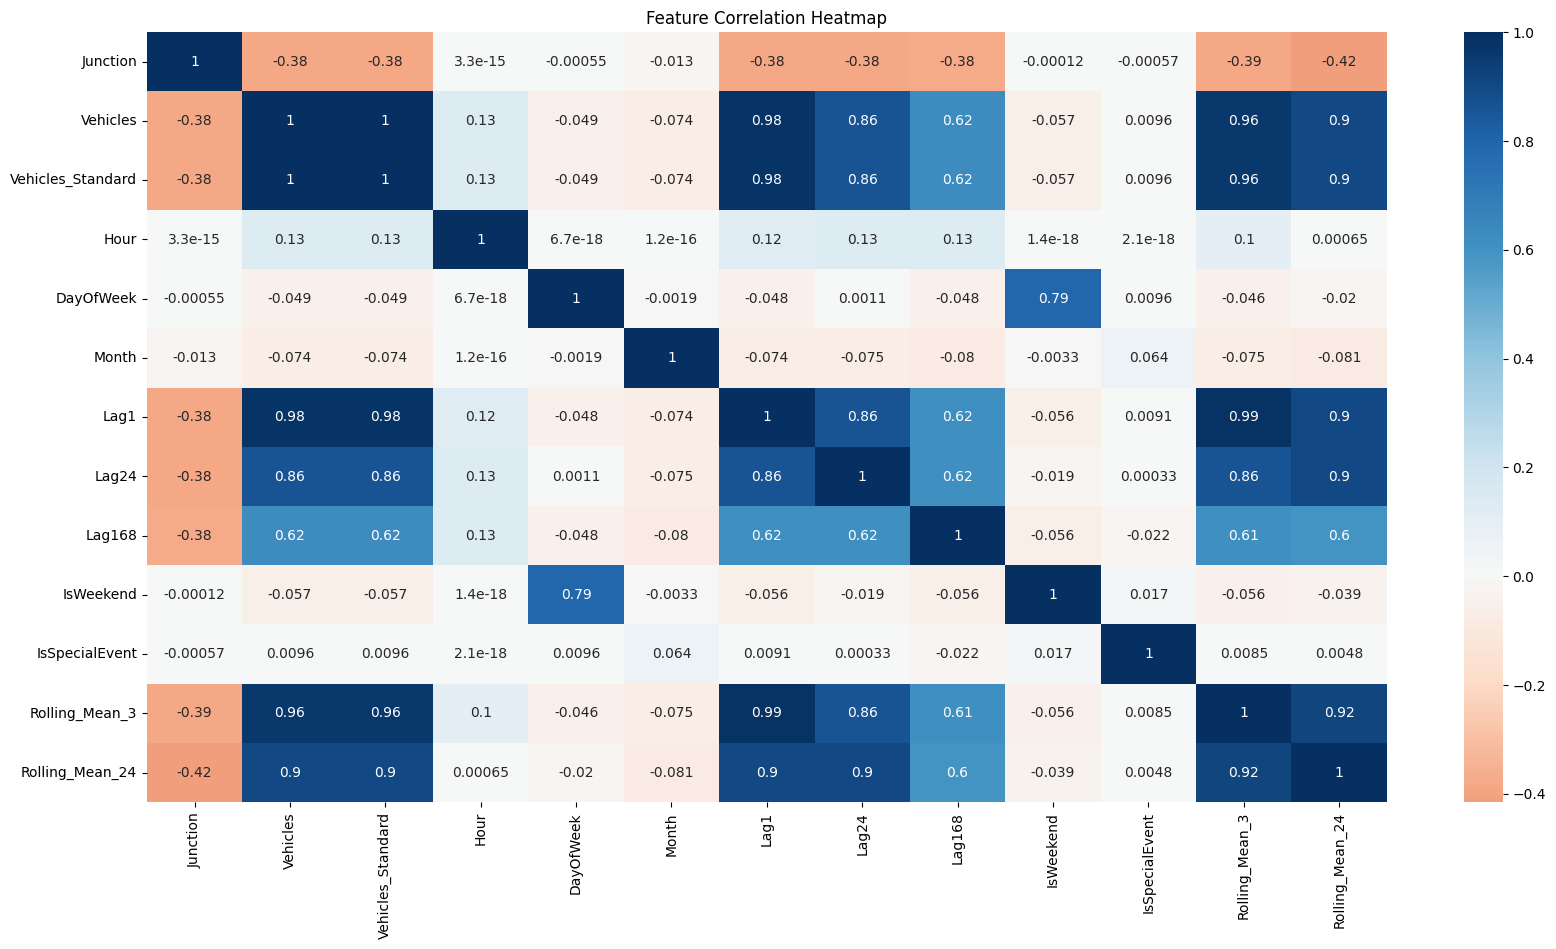

In [94]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

##### Feature importance from tree-based models -> We are using Random forest model

In [97]:
hourly_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83880 entries, 0 to 83879
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Junction           83880 non-null  int64         
 1   DateTime           83880 non-null  datetime64[ns]
 2   Vehicles           83880 non-null  int64         
 3   Vehicles_Standard  83880 non-null  float64       
 4   Hour               83880 non-null  int32         
 5   DayOfWeek          83880 non-null  int32         
 6   Month              83880 non-null  int32         
 7   Lag1               83880 non-null  float64       
 8   Lag24              83880 non-null  float64       
 9   Lag168             83880 non-null  float64       
 10  IsWeekend          83880 non-null  int64         
 11  IsSpecialEvent     83880 non-null  int64         
 12  Rolling_Mean_3     83880 non-null  float64       
 13  Rolling_Mean_24    83880 non-null  float64       
dtypes: dat

In [99]:
all_features = ['Hour', 'DayOfWeek', 'Month', 'Lag1', 'Lag24', 'Lag168', 'IsWeekend', 'IsSpecialEvent', 'Rolling_Mean_3', 'Rolling_Mean_24']

X = hourly_data_scaled.drop(['Junction', 'DateTime', 'Vehicles', 'Vehicles_Standard'], axis = 1)
y = hourly_data_scaled['Vehicles_Standard']

In [101]:
Random_Forest = RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)
Random_Forest.fit(X,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Finding feature importances

In [104]:
feature_importances = Random_Forest.feature_importances_
feature_df = pd.DataFrame({"Features" : all_features, "importances": feature_importances}).sort_values(by = "importances", ascending = False)

In [106]:
feature_df

,Features,importances
3,Lag1,0.956239
0,Hour,0.012818
9,Rolling_Mean_24,0.007896
8,Rolling_Mean_3,0.007399
4,Lag24,0.005009
5,Lag168,0.004856
2,Month,0.002995
1,DayOfWeek,0.002192
6,IsWeekend,0.000363
7,IsSpecialEvent,0.000233


Plotting the importance of features

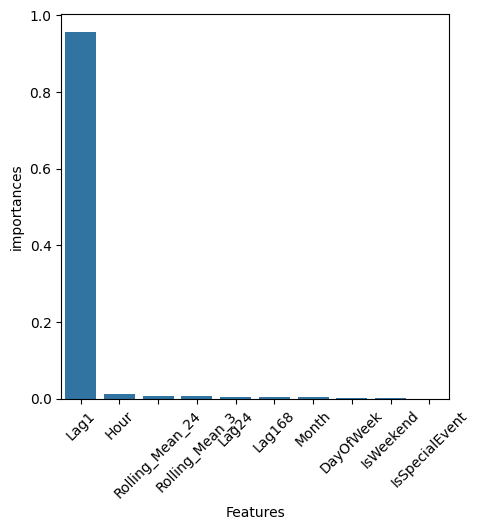

In [109]:
plt.figure(figsize=(5, 5))
sns.barplot(data = feature_df, x="Features", y="importances")
plt.xticks(rotation = 45)
plt.show()

Selecting the most influential features for model training to improve efficiency and performance.

In [112]:
most_influential_features = feature_df['Features'].head(5).tolist()
most_influential_features

['Lag1', 'Hour', 'Rolling_Mean_24', 'Rolling_Mean_3', 'Lag24']